# DANISH CPI DELVEOPMENT 2008M1 - 20024M2 BY KEY ELEMENTS

In this Data project we investigate the danish consumer price index and the subset conponents it is made up off, to get a better understanding of the inflation in the last 16 years
We use data directly gahtered from the Statistics Denmark's StatBank defined as PRIS111. 
https://www.statistikbanken.dk/statbank5a/default.asp?w=1280  
Notice that the data is based on the indexed year of 2015. 

Imports and set magics:

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

We start by importing our data into a dataframe. From here we check the dataframe to see if anythings needs to be cleaned.
As everything looks fine below, the only changes we do are etrapolating the years, from the mont-year format the data is in originally.

In [1]:
# Importing csv data 
file_path = "FPI_DATA.csv" 
df = pd.read_csv(file_path)
#checking how the data looks
df.head(5)

NameError: name 'pd' is not defined

In [22]:
# Extract the first 4 characters from each string in the first column to get the year
df['Years'] = df[df.columns[0]].apply(lambda x: x[:4])

# Now 'df' has an additional column named 'Years' that contains the year portion extracted from the first column
df.head(5)

,Month,00 Forbrugerprisindekset i alt,01 Fødevarer og ikke-alkoholiske drikkevarer,02 Alkoholiske drikkevarer og tobak,03 Beklædning og fodtøj,04 Boligbenyttelse. elektricitet og opvarmning,05 Møbler. husholdningsudstyr og husholdningstjenester,06 Sundhed,07 Transport,08 Kommunikation,09 Fritid og kultur,10 Uddannelse,11 Restauranter og hoteller,12 Andre varer og tjenester,131 Varer i alt,132 Tjenester i alt,141 Forbrugerprisindeks ekskl energi og ikke-forarbejdede fødevarer (Kerneinflation),151 Forbrugerprisindeks ekskl energi,Years
0,2008M01,88.2,89.5,76.5,84.5,84.0,93.5,88.7,95.0,119.4,98.8,76.7,84.0,82.5,92.9,83.8,87.9,88.1,2008
1,2008M02,89.3,89.7,76.5,93.5,85.3,94.0,88.2,95.1,117.9,100.5,76.7,84.6,82.7,93.7,85.0,89.2,89.2,2008
2,2008M03,89.7,90.0,77.7,98.1,85.5,94.3,88.4,95.5,117.8,99.3,76.7,84.9,83.3,94.6,85.0,89.5,89.6,2008
3,2008M04,90.0,90.9,78.3,98.8,85.6,94.6,89.5,95.9,117.3,99.0,76.7,85.3,83.6,95.1,85.1,89.6,89.8,2008
4,2008M05,90.3,91.6,78.3,98.8,85.6,95.1,88.9,97.2,117.1,98.8,76.7,86.0,83.8,95.5,85.2,89.8,90.1,2008


# Plot of data

We begin our analysis by making a large plot of all our data to get a better understanding of it, before beginning a more advanced analysis.


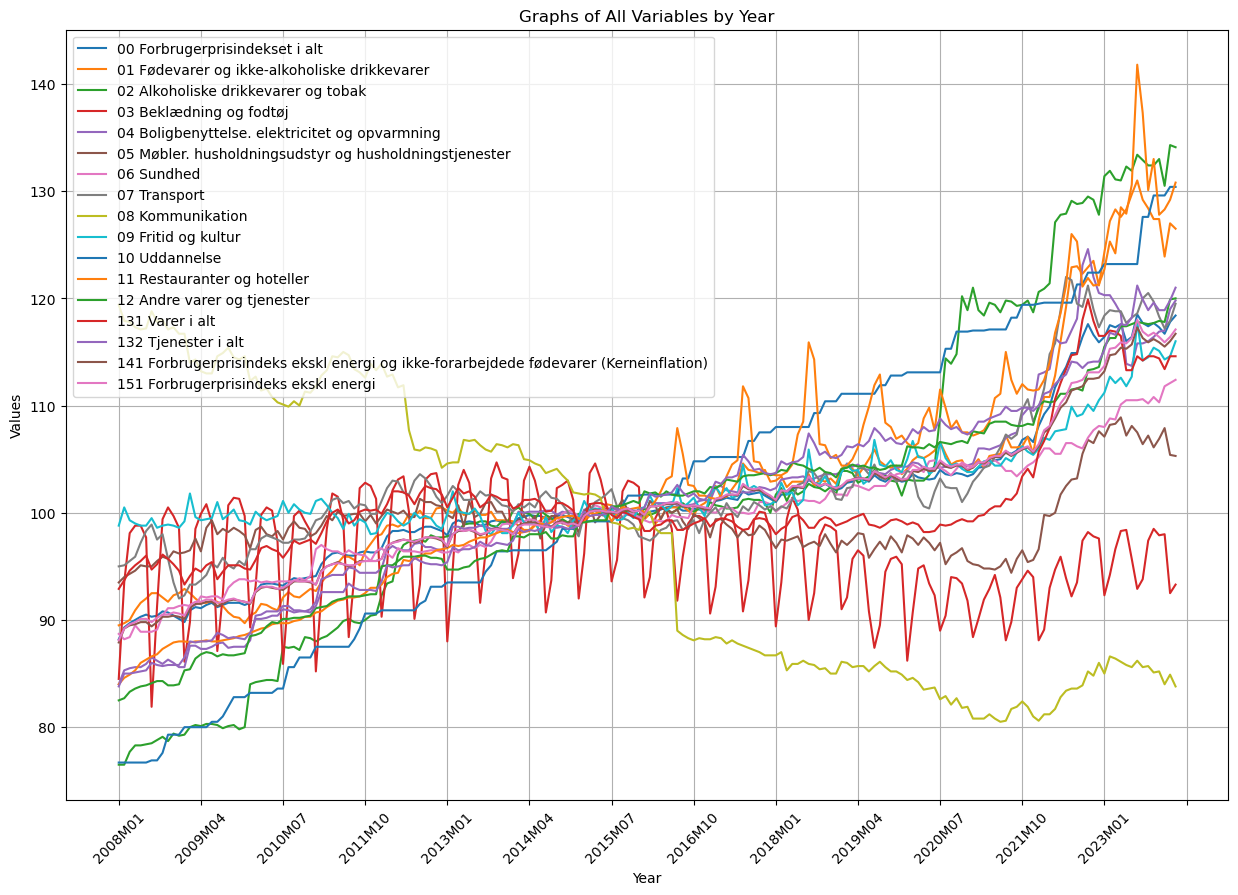

In [23]:
# Extract the year from the first column and create a new 'Year' column
df['Year'] = df[df.columns[0]].apply(lambda x: x[:12])

# Set the figure size for better readability
plt.figure(figsize=(15, 10))

# Plot each column against 'Year', skipping the first original column and the new 'Year' column itself
for column in df.columns[1:-2]:  # Skip the last column as it is the 'Year' column
    plt.plot(df['Year'], df[column], label=column)

# Add legend to the plot
plt.legend()

# Add titles and labels
plt.title('Graphs of All Variables by Year')
plt.xlabel('Year')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15)) #max 15 labels on the x-axis
plt.xticks(rotation=45) 
plt.ylabel('Values')
plt.grid(True)

# Show the plot
plt.show()


We can see the data is generally rising, meaning higher price levels. But as there are a lot of variables and a lot of seasonality, we will get a better understanding of the data by looking at yearly growthrates.

# Analysis

In our analysis we begin by looking at the descriptive statistics to see if there is anything wrong with our data, and to see if it behaves accordingly to our plots.
We then look at the yearly growth-rates by making a table, a plot and an interactive plot.

In [24]:
#Creating the descriptive statistics
df.describe()

,00 Forbrugerprisindekset i alt,01 Fødevarer og ikke-alkoholiske drikkevarer,02 Alkoholiske drikkevarer og tobak,03 Beklædning og fodtøj,04 Boligbenyttelse. elektricitet og opvarmning,05 Møbler. husholdningsudstyr og husholdningstjenester,06 Sundhed,07 Transport,08 Kommunikation,09 Fritid og kultur,10 Uddannelse,11 Restauranter og hoteller,12 Andre varer og tjenester,131 Varer i alt,132 Tjenester i alt,141 Forbrugerprisindeks ekskl energi og ikke-forarbejdede fødevarer (Kerneinflation),151 Forbrugerprisindeks ekskl energi
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,101.029897,102.425773,101.721134,96.350515,100.766495,99.118041,99.727835,102.782990,97.446392,102.468041,101.681959,102.638144,100.036082,100.995361,100.939691,100.561340,100.691237
std,7.165059,9.616688,14.989109,4.885765,8.933048,3.140300,5.338660,6.831129,12.892779,4.271597,14.424814,11.801602,9.052377,5.709026,9.098398,6.693497,6.796462
min,88.200000,89.500000,76.500000,81.900000,84.000000,93.500000,88.200000,92.000000,80.500000,98.000000,76.700000,84.000000,82.500000,92.900000,83.800000,87.900000,88.100000
25%,96.975000,98.100000,92.575000,92.900000,95.300000,97.200000,96.400000,99.225000,85.425000,99.500000,90.900000,93.475000,94.700000,98.525000,93.925000,95.975000,96.000000
50%,100.200000,100.400000,100.200000,96.950000,100.550000,98.800000,99.900000,101.150000,98.500000,100.750000,101.700000,100.550000,101.550000,99.500000,100.900000,100.300000,100.400000
75%,103.200000,104.575000,103.675000,100.100000,104.200000,100.000000,103.675000,103.275000,110.375000,104.400000,113.100000,108.350000,106.075000,101.200000,107.400000,103.775000,103.975000
max,118.500000,131.000000,134.300000,104.700000,124.600000,108.900000,112.400000,122.000000,119.400000,117.800000,130.400000,141.800000,120.000000,119.900000,121.200000,117.300000,118.000000


Above we can see how our data looks fine, with a constant count, low min, high max and everything inbetween looking good.

We now look at the percentage growth in the CPI and it's subsets and calculating the average growth rate, to get an understanding of how the individual components have done on average over the years. 

In [25]:
# We select the columns from 1 to 18, as these are the columns containing the data we want to analyze
columns_1_to_18 = df.iloc[:, 1:18]

# Group the selected columns by the 'Years' variable and calculate the average for each year
average_by_year = columns_1_to_18.groupby(df['Years']).mean()

# We drop the 2024 obs, as we only ahve the first two months
average_by_year = average_by_year.drop('2024')

# Create a new DataFrame from the calculated averages
average_df = pd.DataFrame(average_by_year)

# Calculate the growth rate for each year
growth_rates = average_df.pct_change()

# Remove the first row (2008) since it doesn't have a previous year for comparison
growth_rates = growth_rates.dropna()

# Creating the first and last row to find the annual growth rate
first_row = average_by_year.iloc[0]
last_row = average_by_year.iloc[-1]
# Calculate the number of years
num_years = 2023-2008

# Calculate the average growth rate
average_growth_rate = ((last_row / first_row) ** (1 / num_years) - 1)*100
print("Average Growth Rate of CPI and components of the danish CPI for the period 2008 - 2023")
average_growth_rate.head(100)

Average Growth Rate of CPI and components of the danish CPI for the period 2008 - 2023


00 Forbrugerprisindekset i alt                                                          1.772155
01 Fødevarer og ikke-alkoholiske drikkevarer                                            2.252857
02 Alkoholiske drikkevarer og tobak                                                     3.545357
03 Beklædning og fodtøj                                                                 0.065040
04 Boligbenyttelse. elektricitet og opvarmning                                          2.098131
05 Møbler. husholdningsudstyr og husholdningstjenester                                  0.819384
06 Sundhed                                                                              1.385390
07 Transport                                                                            1.424867
08 Kommunikation                                                                       -2.100012
09 Fritid og kultur                                                                     0.924964
10 Uddannelse                 

As we can see above, there has been on average in the CPI an growth of 1.7% per year, while  Communication has had an negative average growth rate over the years and alcoholic beverages and tobaco has had the higest increase of 3,5% pr year. \
As these are just yearly averages, and as we know the prices has flucturated more since the pandemic and war in Ukraine, we will now plot the yearly growth rates of all the subsets to see if it is these recent years, which is the driving force behind the average CPI growth.

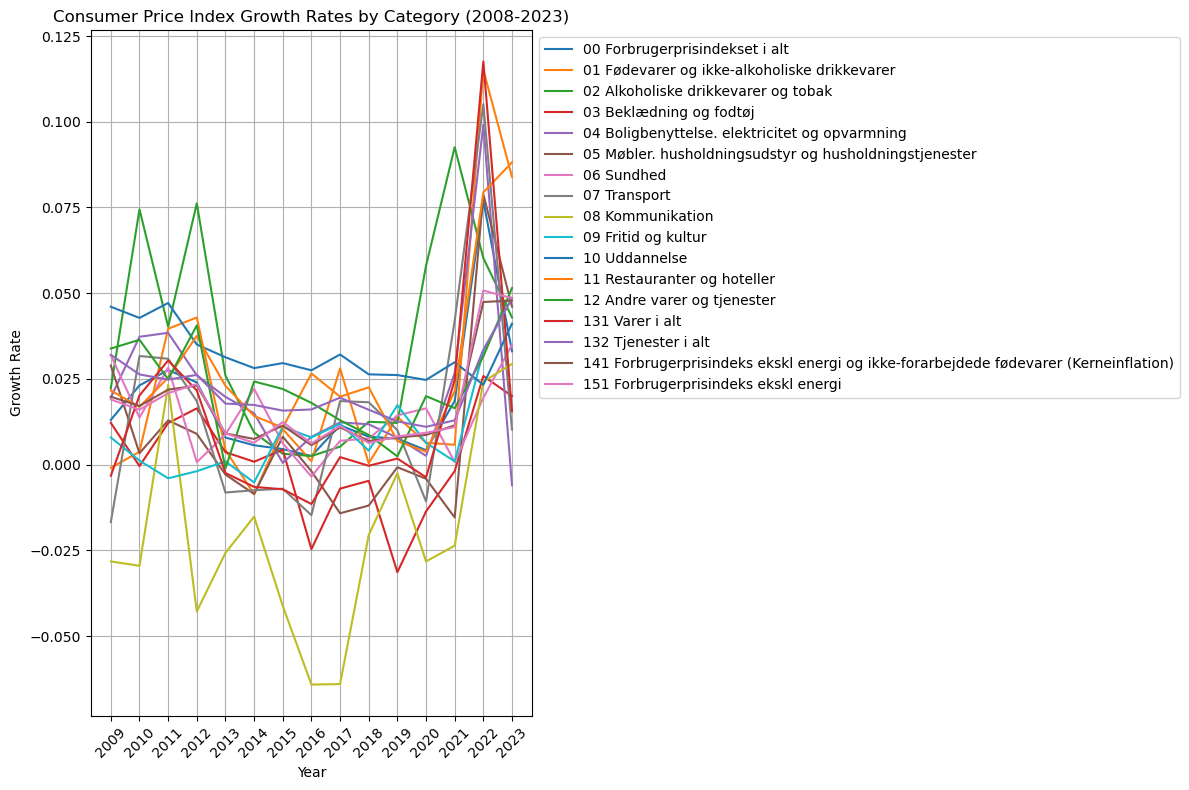

In [26]:
# Plot the growth rates
plt.figure(figsize=(12, 8))

# Plot each column (category) separately
for column in growth_rates.columns:
    plt.plot(growth_rates.index, growth_rates[column], label=column)

plt.title('Consumer Price Index Growth Rates by Category (2008-2023)')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [27]:
# Creating the interactive plot
def plot_growth_rates(category):
    plt.figure(figsize=(12, 8))
    plt.plot(growth_rates.index, growth_rates[category], label=category)
    plt.title(f'Consumer Price Index Growth Rates by {category} (2009-2023)')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create a dropdown and link it to the plotting function
dropdown = widgets.Dropdown(options=growth_rates.columns, description='Category:')
widgets.interactive(plot_growth_rates, category=dropdown)

interactive(children=(Dropdown(description='Category:', options=('00 Forbrugerprisindekset i alt', '01 Fødevar…

As we can see from the graph above, from 2021 and 2022, there wre large spikes in growth of all varaibles, even communication, clothing and transport, which were negative for most of our timeframe. We can therfore see how the growth in prices has indeed been caused in more recent years, and that the average growth rate would have been much lower, had it not been for 2021 and 2022. \
As the graph is somewhat cluttered we have also created an interactive graph to look at the individual subsections growthrates.

# Conclusion

In this project we have investigated the consumer price index in denmark with its subsections on the last 16 years, with data collected from denmark statistics. We have found how the CPI has had an average growth oof just below the usually targeted rate of 2% per year. At the same this increase has not been homogenous across the different subsections of the CPI with some even being negative. At the same time we also found how much of this inflation is driven by the recent increases in prices as all the different subsections rose up around 2021-2022.